In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import IGate, XGate, CXGate
from qiskit.quantum_info import Operator
from qiskit_aer import AerSimulator

In [ ]:
# Create Unitary Oracles for Constant and Balanced Functions
I= Operator(IGate())
X= Operator(XGate())
CX_1= Operator(CXGate())
CX_0= Operator(CXGate(ctrl_state= 0))

U_list= [None for i in range(4)]
U_list[0]= Operator(I^I^I^I) # for Constant f(x)= 0
U_list[1]= Operator(CX_1^I^I) # for Balanced f(x)= ⌊x/4⌋
U_list[2]= Operator(X^I^I^I) # for Constant f(x)= 1
U_list[3]= Operator(CX_1^I^I) # for Balanced f(x)= ⌊(7-x)/4⌋

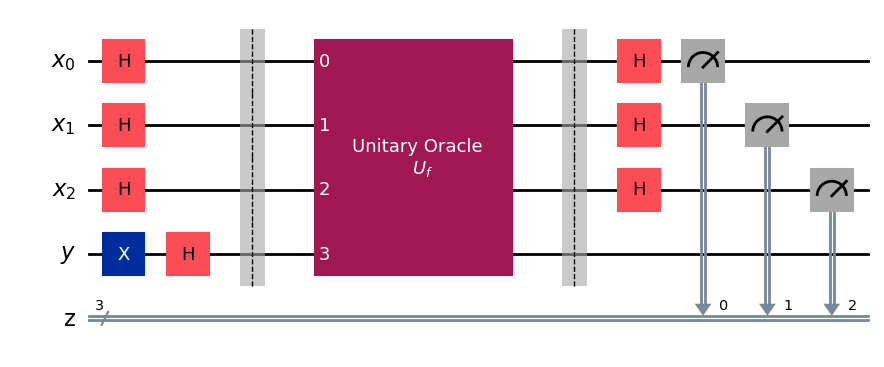

In [3]:
# Define a function to implement the Deutsch- Jozsa Algorithm
def circuit(U):
    x= QuantumRegister(3, "x")
    y= QuantumRegister(1, "y")
    z= ClassicalRegister(3, "z")
    circuit= QuantumCircuit(x, y, z)

    circuit.x(3)
    circuit.h(range(4)) # set y to be in the minus state and x to be in uniform superposition
    circuit.barrier()

    U_f= U.to_instruction() # create the unitary oracle gate which maps |x⟩|y⟩ to |x⟩|y ⊕ f(x)⟩.
    circuit.unitary(U_f, range(4), "Unitary Oracle \n $U_f$")
    circuit.barrier()

    circuit.h(range(0,3))
    circuit.measure(x, z)

    return circuit

display(circuit(Operator(I^I^I^I)).draw(output="mpl")) # dummy circuit for visualisation

In [4]:
# Determine whether the Functions are Constant or Balanced
outcomes= []

for U in U_list:
    result= AerSimulator().run(circuit(U), shots= 1).result() # only a single query is required
    outcomes.append(list(result.get_counts().keys())[0])

for i in range(4):
    if outcomes[i] == "000":
        print(f"Query {i+1}: The Function is constant\n")
    else:
        print(f"Query {i+1}: The Function is balanced\n")

Query 1: The Function is constant

Query 2: The Function is balanced

Query 3: The Function is constant

Query 4: The Function is balanced

